<a href="https://colab.research.google.com/github/veritaem/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for mega super duper extra bonus supreme points, write your own function that can calculate these two values for any sized list)

In [3]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean = sum(sales)/len(sales)
mean

3052.714285714286

In [4]:
np.var(sales)

183761.06122448976

In [5]:
np.std(sales)

428.67360686714756

In [0]:
def varstd(numbers):
  mean = sum(numbers)/len(numbers)
  sosm = []
  for x in numbers:
    sosm.append((x-mean)**2)
  variance = sum(sosm) / (len(numbers) - 1)
  std = variance ** .5
  return 'var:', variance, 'std:', std

In [59]:
varstds = varstd(sales)
varstds

('var:', 214387.90476190473, 'std:', 463.0204150595357)

In [60]:
varstdc = varstd(customers)
varstdc

('var:', 290.95238095238096, 'std:', 17.057326313123664)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [12]:
customers = [127, 80, 105, 92, 120, 115, 93]
data = {'sales': sales, 'customers': customers}
df = pd.DataFrame(data)
df

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [14]:
df.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


In [16]:
np.cov (customers, sales)[1][0]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [61]:
cov =np.cov(sales, customers)
cov[1][0]  / (varstds[3] * varstdc[3])

0.9628339778148909

In [55]:
df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
csv= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [52]:
dftitanic = pd.read_csv(csv)
dftitanic.corr()


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [63]:
dftitanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 2)

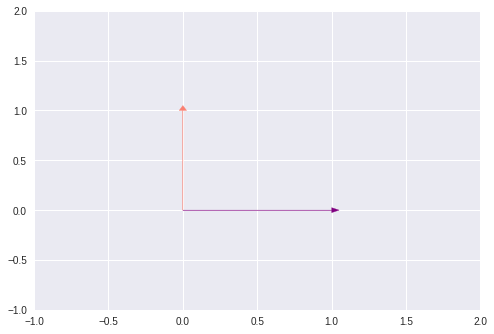

In [65]:
#perpendicular
arr1 = (1,0)
arr2 = (0,1)
plt.arrow(0,0, arr1[0], arr1[1],head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0,0, arr2[0], arr2[1],head_width=.05, head_length=0.05, color ='salmon')
plt.xlim(-1,2)          
plt.ylim(-1,2)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [67]:
a = (-5, 3, 7)
b = (6, -8, 2)

np.dot(a, b)
#no, dot not equal to 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [87]:
np.linalg.norm(c)

25.787593916455254

In [91]:
c * c.T

matrix([[665]])

In [83]:
c = np.mat('2 -15 6 20')
np.matmul(c.T, c)

matrix([[   4,  -30,   12,   40],
        [ -30,  225,  -90, -300],
        [  12,  -90,   36,  120],
        [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 \begin{bmatrix} 1\\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [92]:
f = [4, 12, 11, 9, 2]
f2 = [.25 * f[0], 1/12 * f[1], 1/11 * f[2], 1/9*f[3], .5*f[4]] 
f2

[1.0, 1.0, 1.0, 1.0, 1.0]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:

vectors = np.array([[0, 0, 0, 6, 6, 6],
                   [0, 0, 0, 12, 12, 12],
                   [0, 0, 0, -6, 14, 8],
                   [0, 0, 0, 10, 3, -5]])


(-10, 15)

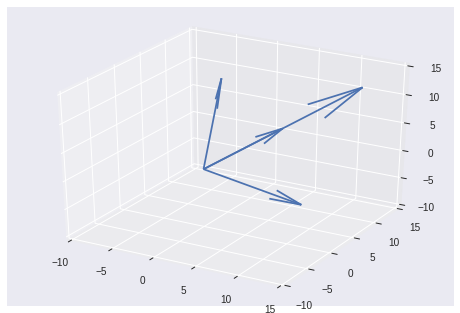

In [107]:
X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length = 1)
ax.set_xlim(-10, 15)
ax.set_ylim(-10, 15)
ax.set_zlim(-10, 15)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#linearly dependant so they can only represent a line
R1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#independant so they can represent any vector in the space
R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(-1, 2)

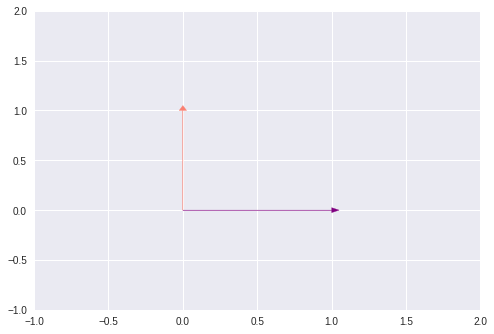

In [108]:
plt.arrow(0,0, arr1[0], arr1[1],head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0,0, arr2[0], arr2[1],head_width=.05, head_length=0.05, color ='salmon')
plt.xlim(-1,2)          
plt.ylim(-1,2)

## 6.2 What does it mean to form a basis?

the vectors need to be linearly independant and span the space S.  This means that through combining operators with just these basis vectors you should be able to get any vector in that dimension e.g [1,0] can be paired with [0,1 ]and then scaled by 3 to get [3, 0] and [0, 3], etc.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [109]:
p = np.mat('1 2 3; -1 0 7; 4 8 2')
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

how many dimensions it can span.  In the case of the example since it has all 3 ranks as independant, it can span R3

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [134]:
v = [1, 3]
w = [-1, 2]


2.8284271247461903

In [136]:
np.dot(v, v)

10

In [137]:
np.dot(w, v)

5

In [0]:
proj = np.multiply(.5,v)
proj_line = w - proj



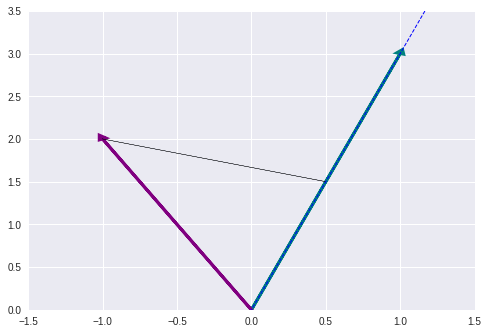

In [157]:

x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.xlim(-1.5, 1.5)
plt.ylim(0, 3.5)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='teal')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(proj[0], proj[1], proj_line[0], proj_line[1])


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

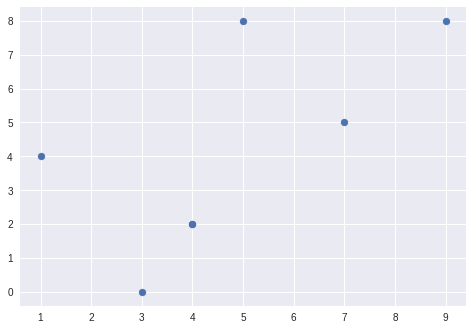

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()